Develop an Artificial Neural Network From Scratch for  MNIST Handwritten Digit Classification.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


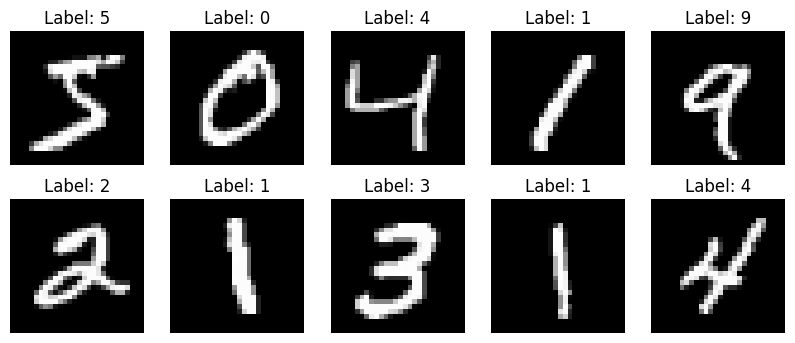

Processed training data shape: (60000, 784)
Processed training labels shape: (60000, 10)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the shapes of the datasets
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Visualize some examples from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

# Preprocess the data: normalize, reshape, and one-hot encode the labels
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images from 28x28 to 784
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# One-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

train_labels = one_hot_encode(train_labels)
test_labels = one_hot_encode(test_labels)

print(f"Processed training data shape: {train_images.shape}")
print(f"Processed training labels shape: {train_labels.shape}")


In [16]:
# Develop Simple ANN

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Define the sigmoid activation function and its derivative
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

# Define the softmax function
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=1, keepdims=True)

# Implement forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Compute the loss function (cross-entropy loss)
def compute_loss(Y, A2):
    m = Y.shape[0]
    log_probs = -np.log(A2[range(m), np.argmax(Y, axis=1)])
    loss = np.sum(log_probs) / m
    return loss

# Implement backward propagation
def backward_propagation(X, Y, Z1, A1, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters using gradient descent
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


Epoch 1/20, Loss: 0.5119
Epoch 2/20, Loss: 0.5227
Epoch 3/20, Loss: 0.4237
Epoch 4/20, Loss: 0.2474
Epoch 5/20, Loss: 0.1283
Epoch 6/20, Loss: 0.1451
Epoch 7/20, Loss: 0.2331
Epoch 8/20, Loss: 0.3822
Epoch 9/20, Loss: 0.1748
Epoch 10/20, Loss: 0.1101
Epoch 11/20, Loss: 0.1100
Epoch 12/20, Loss: 0.2495
Epoch 13/20, Loss: 0.1739
Epoch 14/20, Loss: 0.1806
Epoch 15/20, Loss: 0.1031
Epoch 16/20, Loss: 0.3116
Epoch 17/20, Loss: 0.0524
Epoch 18/20, Loss: 0.2369
Epoch 19/20, Loss: 0.0788
Epoch 20/20, Loss: 0.0730


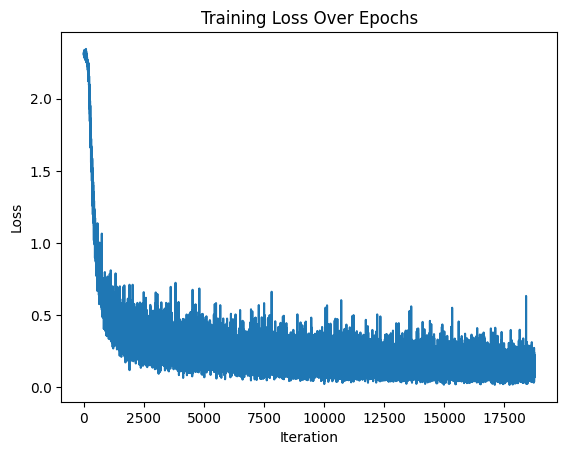

In [17]:
# Training parameters
input_size = 784  # 28x28 pixels
hidden_size = 64  # Number of hidden units
output_size = 10  # Number of classes (0-9)
learning_rate = 0.1
num_epochs = 20
batch_size = 64

# Initialize parameters
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Training loop
losses = []
for epoch in range(num_epochs):
    # Shuffle the data
    permutation = np.random.permutation(train_images.shape[0])
    train_images_shuffled = train_images[permutation]
    train_labels_shuffled = train_labels[permutation]

    # Batch processing
    for i in range(0, train_images.shape[0], batch_size):
        X_batch = train_images_shuffled[i:i+batch_size]
        Y_batch = train_labels_shuffled[i:i+batch_size]

        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X_batch, W1, b1, W2, b2)

        # Compute loss
        loss = compute_loss(Y_batch, A2)
        losses.append(loss)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X_batch, Y_batch, Z1, A1, A2, W1, W2)

        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")

# Plot the loss over epochs
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

Test Accuracy: 0.9588


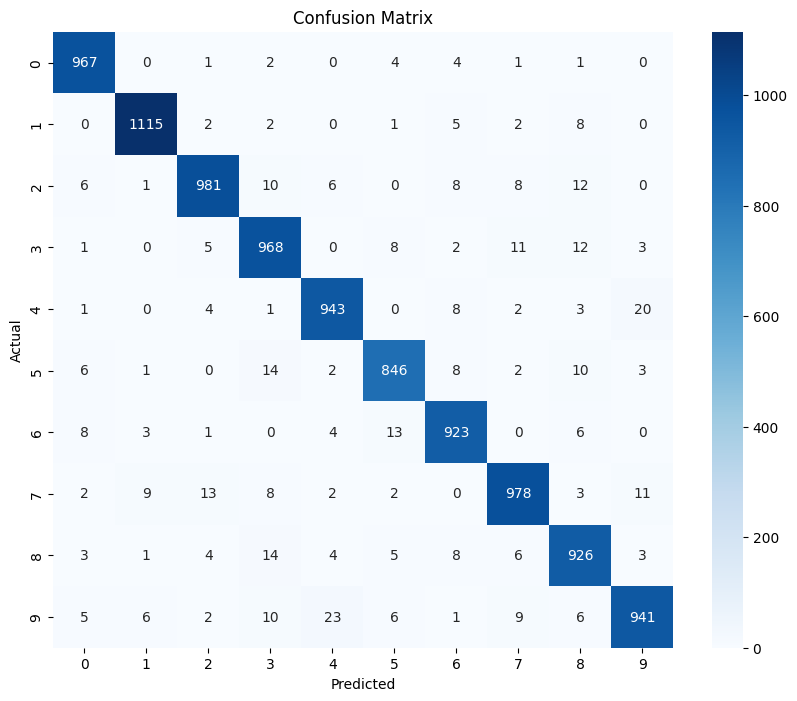

In [18]:
# Evaluation of Model

# Forward propagation on the test set
_, _, _, A2_test = forward_propagation(test_images, W1, b1, W2, b2)

# Compute accuracy
test_predictions = np.argmax(A2_test, axis=1)
test_labels_actual = np.argmax(test_labels, axis=1)
accuracy = np.mean(test_predictions == test_labels_actual)

print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels_actual, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [19]:
# Define the ReLU activation function and its derivative
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(A):
    return np.where(A > 0, 1, 0)

# Define the Leaky ReLU activation function and its derivative
def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def leaky_relu_derivative(A, alpha=0.01):
    return np.where(A > 0, 1, alpha)

In [20]:
# Adam optimizer update function
def adam_update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate, v, s, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
    v['dW1'] = beta1 * v['dW1'] + (1 - beta1) * dW1
    v['db1'] = beta1 * v['db1'] + (1 - beta1) * db1
    v['dW2'] = beta1 * v['dW2'] + (1 - beta1) * dW2
    v['db2'] = beta1 * v['db2'] + (1 - beta1) * db2
    v['dW3'] = beta1 * v['dW3'] + (1 - beta1) * dW3
    v['db3'] = beta1 * v['db3'] + (1 - beta1) * db3

    s['dW1'] = beta2 * s['dW1'] + (1 - beta2) * (dW1 ** 2)
    s['db1'] = beta2 * s['db1'] + (1 - beta2) * (db1 ** 2)
    s['dW2'] = beta2 * s['dW2'] + (1 - beta2) * (dW2 ** 2)
    s['db2'] = beta2 * s['db2'] + (1 - beta2) * (db2 ** 2)
    s['dW3'] = beta2 * s['dW3'] + (1 - beta2) * (dW3 ** 2)
    s['db3'] = beta2 * s['db3'] + (1 - beta2) * (db3 ** 2)

    v_corrected = {}
    s_corrected = {}

    for key in v.keys():
        v_corrected[key] = v[key] / (1 - beta1 ** t)
        s_corrected[key] = s[key] / (1 - beta2 ** t)

    W1 -= learning_rate * v_corrected['dW1'] / (np.sqrt(s_corrected['dW1']) + epsilon)
    b1 -= learning_rate * v_corrected['db1'] / (np.sqrt(s_corrected['db1']) + epsilon)
    W2 -= learning_rate * v_corrected['dW2'] / (np.sqrt(s_corrected['dW2']) + epsilon)
    b2 -= learning_rate * v_corrected['db2'] / (np.sqrt(s_corrected['db2']) + epsilon)
    W3 -= learning_rate * v_corrected['dW3'] / (np.sqrt(s_corrected['dW3']) + epsilon)
    b3 -= learning_rate * v_corrected['db3'] / (np.sqrt(s_corrected['db3']) + epsilon)

    return W1, b1, W2, b2, W3, b3, v, s

In [21]:
v = {'dW1': np.zeros_like(W1), 'db1': np.zeros_like(b1), 'dW2': np.zeros_like(W2), 'db2': np.zeros_like(b2), 'dW3': np.zeros_like(W3), 'db3': np.zeros_like(b3)}
s = {'dW1': np.zeros_like(W1), 'db1': np.zeros_like(b1), 'dW2': np.zeros_like(W2), 'db2': np.zeros_like(b2), 'dW3': np.zeros_like(W3), 'db3': np.zeros_like(b3)}


In [22]:
import pickle

# Save the model
model_parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
with open("mnist_ann_model.pkl", "wb") as f:
    pickle.dump(model_parameters, f)

print("Model saved to mnist_ann_model.pkl")

# Load the model
with open("mnist_ann_model.pkl", "rb") as f:
    loaded_parameters = pickle.load(f)

W1_loaded = loaded_parameters["W1"]
b1_loaded = loaded_parameters["b1"]
W2_loaded = loaded_parameters["W2"]
b2_loaded = loaded_parameters["b2"]

print("Model loaded from mnist_ann_model.pkl")


Model saved to mnist_ann_model.pkl
Model loaded from mnist_ann_model.pkl


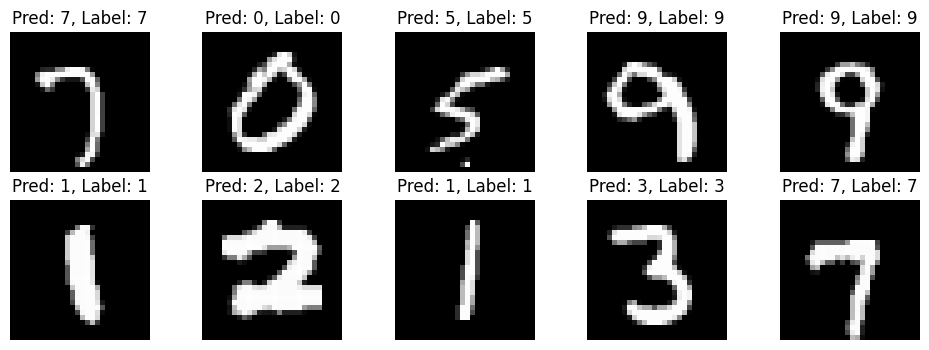

Number of misclassified examples: 412


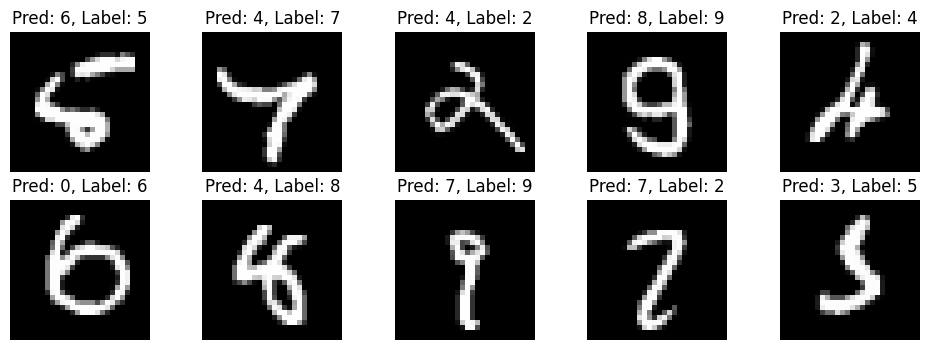

In [23]:
# Make predictions using the loaded model
_, _, _, A2_loaded = forward_propagation(test_images, W1_loaded, b1_loaded, W2_loaded, b2_loaded)

# Visualize some sample predictions
def plot_sample_predictions(images, predictions, labels, num_samples=10):
    plt.figure(figsize=(12, 4))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"Pred: {predictions[i]}, Label: {labels[i]}")
        plt.axis('off')
    plt.show()

sample_indices = np.random.choice(test_images.shape[0], 10, replace=False)
sample_images = test_images[sample_indices]
sample_predictions = np.argmax(A2_loaded[sample_indices], axis=1)
sample_labels = test_labels_actual[sample_indices]

plot_sample_predictions(sample_images, sample_predictions, sample_labels)

# Identify misclassified examples
misclassified_indices = np.where(test_predictions != test_labels_actual)[0]
if len(misclassified_indices) > 0:
    print(f"Number of misclassified examples: {len(misclassified_indices)}")

    # Plot some misclassified examples
    plot_sample_predictions(test_images[misclassified_indices],
                            test_predictions[misclassified_indices],
                            test_labels_actual[misclassified_indices])
else:
    print("No misclassified examples found.")
